# Zbiory danych treningowych

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import display
from collections import Counter
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import seaborn as sns

CURR_FILE_NAME = "train.csv" # or test.csv
TARGET_CLASS_NAME = "satisfaction"

colors = ["#0101DF", "#DF0101"]

In [182]:

def load_data(path):
  if path is None or path == "":
    raise ValueError("Dataset path is invalid")
  elif not os.path.exists(path):
    raise FileNotFoundError(f"Dataset not found at path: {path}")

  train_path = os.path.join(path, CURR_FILE_NAME)

  return pd.read_csv(train_path)

In [183]:
def analyze_data(df, class_column_key):
  #display shape
  display(df.shape)
  #display sum of cells having null value and column name
  null_counts = df.isnull().sum()
  max_nulls = null_counts.max()
  max_null_col = null_counts[null_counts == max_nulls].index[0] if max_nulls > 0 else "No nulls"
  display(f"Maximum null values: {max_nulls} in column: {max_null_col}")
  # Get null values and dataframe information
  print('Null Values In DataFrame: {}\n'.format(df.isna().sum().sum()))
  display(df.info())

  label_col = df[class_column_key]

  # Plotting data
  label_counts = label_col.value_counts()

  # Get colors
  n = label_counts.shape[0]
  colormap = get_cmap('viridis')
  colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

  plt.figure(figsize=(10, 6)) # Create a new figure and set its size
  plt.bar(label_counts.index, label_counts.values, color=colors) # Create a bar plot
  plt.title('Class counts') # Set the title of the plot
  plt.xlabel('Class names') # Set the label for the x-axis
  plt.ylabel('Count') # Set the label for the y-axis
  plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
  plt.show() # Display the plot

  display(df.describe(include='all'))

In [184]:
def plot_distributions(df, class_names):
  for class_name in class_names:
    df_frist_class = df[class_name]
    fig1, ax1 = plt.subplots(figsize=(9, 5))
    sns.distplot(df_frist_class.values, ax=ax1, color='r')
    ax1.set_title('Distribution of ' + class_name, fontsize=14)
    ax1.set_xlim([df_frist_class.min(), df_frist_class.max()])
    plt.show()

# Balanced airflight satisfaction



In [185]:
df = load_data("data/raw/binary_balanced_airflight_satisfaction")

In [186]:
#dropping id and unnamed column
df = df.drop(df.iloc[:,[0, 1]], axis = 1)

# Conver all special characters and whitespace  to underscores
df.columns = df.columns.str.replace(r'[^\w\s]', '_').str.replace(r'\s+', '_').str.lower()

df.columns

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_57064/1199417295.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_57064/1199417295.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [187]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
df.iloc[:, categorical_indexes] = df.iloc[:, categorical_indexes].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   gender                             103904 non-null  category
 1   customer_type                      103904 non-null  category
 2   age                                103904 non-null  int64   
 3   type_of_travel                     103904 non-null  category
 4   class                              103904 non-null  category
 5   flight_distance                    103904 non-null  int64   
 6   inflight_wifi_service              103904 non-null  category
 7   departure_arrival_time_convenient  103904 non-null  category
 8   ease_of_online_booking             103904 non-null  category
 9   gate_location                      103904 non-null  category
 10  food_and_drink                     103904 non-null  category
 11  online_boarding           

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_57064/3669382306.py:2: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [188]:
df.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


(103904, 23)

'Maximum null values: 310 in column: arrival_delay_in_minutes'

Null Values In DataFrame: 310

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   gender                             103904 non-null  category
 1   customer_type                      103904 non-null  category
 2   age                                103904 non-null  int64   
 3   type_of_travel                     103904 non-null  category
 4   class                              103904 non-null  category
 5   flight_distance                    103904 non-null  int64   
 6   inflight_wifi_service              103904 non-null  category
 7   departure_arrival_time_convenient  103904 non-null  category
 8   ease_of_online_booking             103904 non-null  category
 9   gate_location                      103904 non-null  category
 10  food_and_drink                     103904 non-null  category


None

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_57064/2670232780.py:20: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



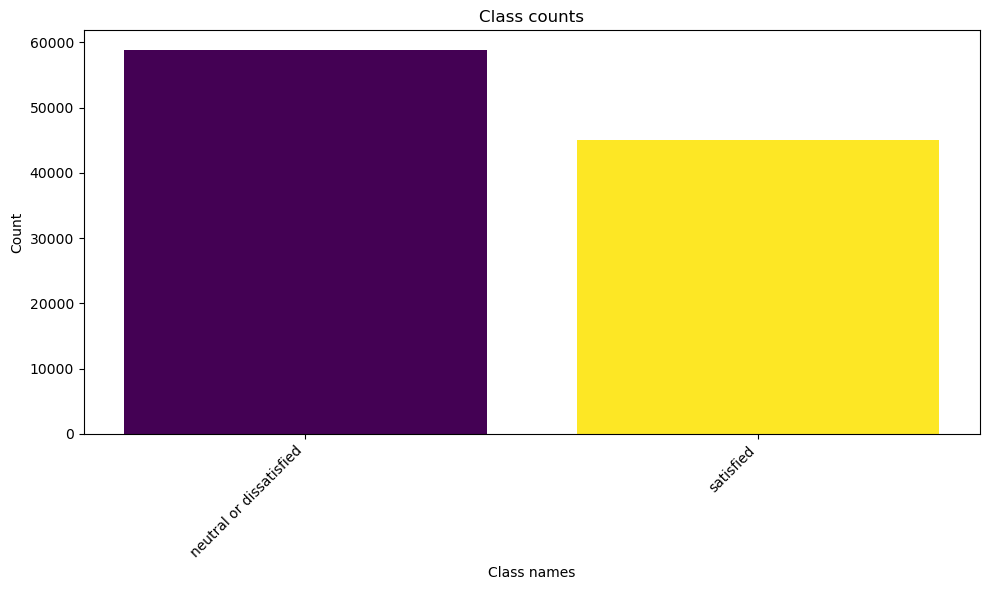

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
count,103904,103904,103904.000000,103904,103904,103904.000000,103904.0,103904.0,103904.0,103904.0,...,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.000000,103594.000000,103904
unique,2,2,NaN,2,3,NaN,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,5.0,6.0,6.0,6.0,NaN,NaN,2
top,Female,Loyal Customer,NaN,Business travel,Business,NaN,3.0,4.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,neutral or dissatisfied
freq,52727,84923,NaN,71655,49665,NaN,25868.0,25546.0,24449.0,28577.0,...,29423.0,30867.0,28789.0,37383.0,29055.0,37945.0,27179.0,NaN,NaN,58879
mean,NaN,NaN,39.379706,NaN,NaN,1189.448375,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.815618,15.178678,NaN
std,NaN,NaN,15.114964,NaN,NaN,997.147281,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.230901,38.698682,NaN
min,NaN,NaN,7.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,27.000000,NaN,NaN,414.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,NaN,NaN,40.000000,NaN,NaN,843.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
75%,NaN,NaN,51.000000,NaN,NaN,1743.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,13.000000,NaN


In [189]:
analyze_data(df, TARGET_CLASS_NAME)

# Filling missing values

In [119]:
df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].median(axis = 0), inplace = True)

In [120]:
print(df.isnull().sum())

gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on_board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64


/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_57064/881755835.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




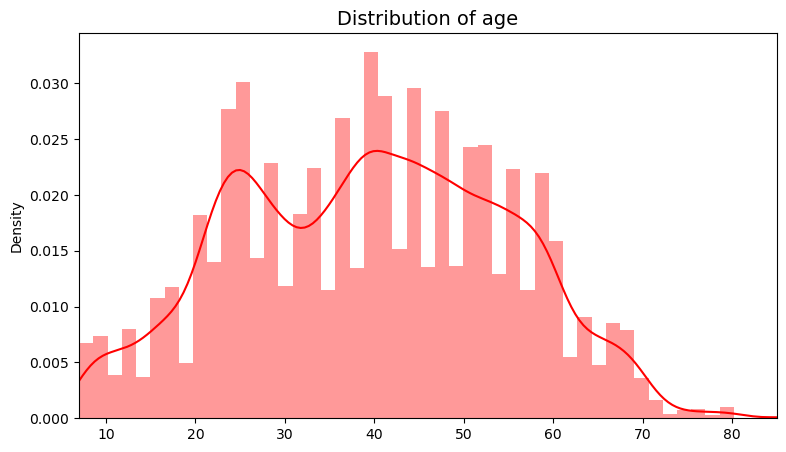

<Figure size 1200x800 with 0 Axes>

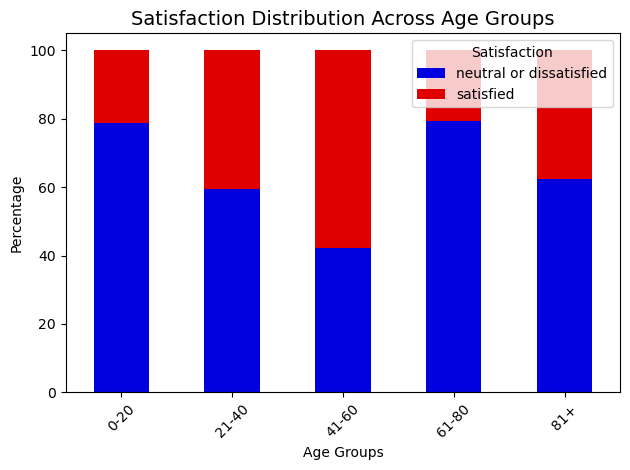

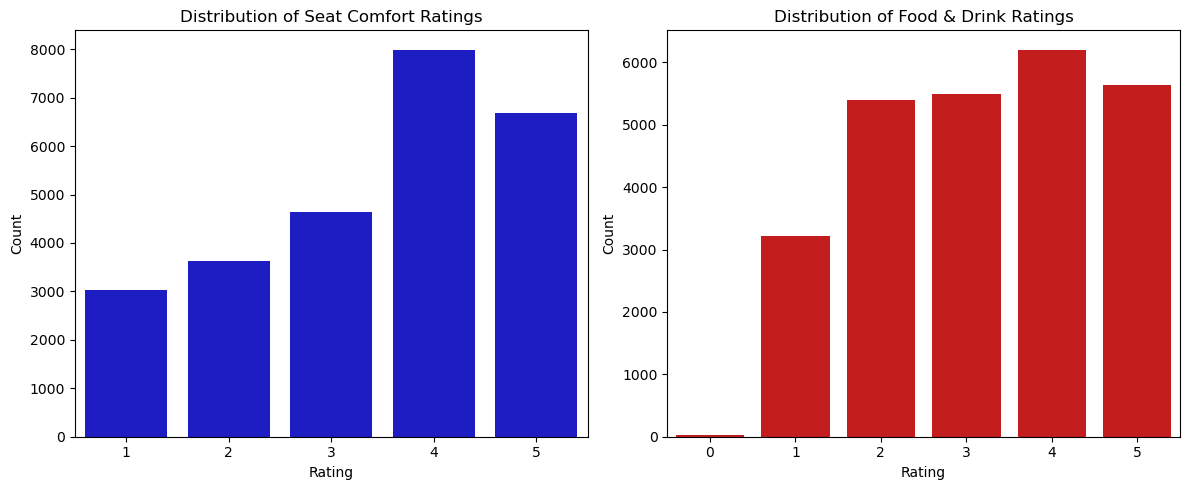

14


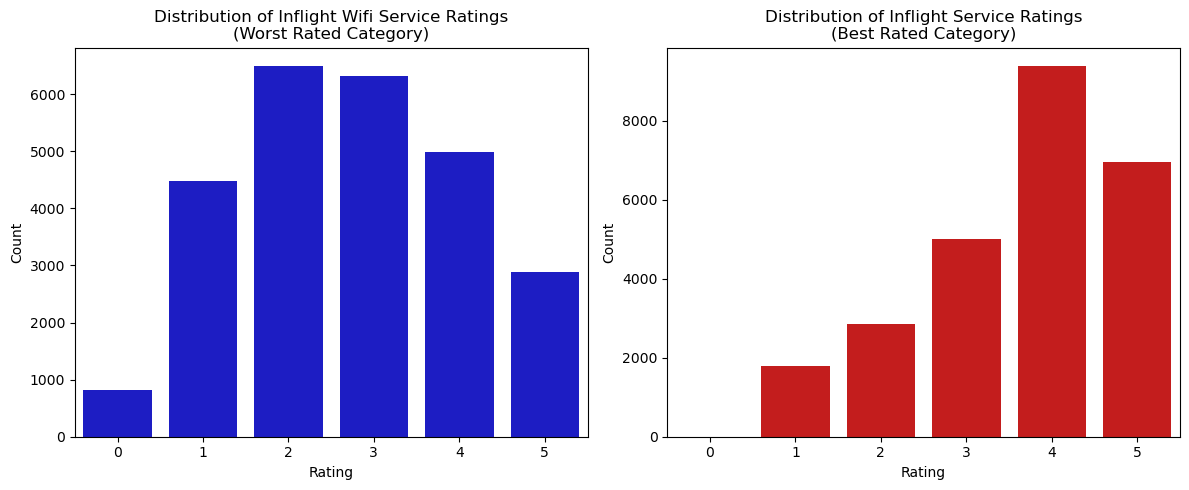

In [121]:
plot_distributions(df, ['age'])

# Create age groups for more detailed analysis
df['age_group'] = pd.cut(df['age'], bins=[0,20,40,60,80,100], labels=['0-20','21-40','41-60','61-80','81+'])

# Plot satisfaction distribution across age groups
plt.figure(figsize=(12,8))
satisfaction_by_age_group = pd.crosstab(df['age_group'], df['satisfaction'], normalize='index') * 100

satisfaction_by_age_group.plot(kind='bar', stacked=True, color=colors)
plt.title('Satisfaction Distribution Across Age Groups', fontsize=14)
plt.xlabel('Age Groups')
plt.ylabel('Percentage')
plt.legend(title='Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Drop age_group column
df = df.drop('age_group', axis=1)


# Plot distribution of ratings for seat comfort and food/drink
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(data=df, x='seat_comfort', color=colors[0])
plt.title('Distribution of Seat Comfort Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.subplot(1,2,2) 
sns.countplot(data=df, x='food_and_drink', color=colors[1])
plt.title('Distribution of Food & Drink Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Create a pass of size for categorical columns
all_categorical_columns = [col for col in df.columns if df[col].dtype == 'category']
exclude_columns = ['gender', 'type_of_travel', 'customer_type', 'class', 'age', 'flight_distance', 'arrival_delay_in_minutes', 'departure_delay_in_minutes', 'satisfaction']
service_columns = [col for col in all_categorical_columns if col not in exclude_columns]


# Calculate mean rating for each service category
df_numeric = df[service_columns].dropna().astype('int')
service_means = df_numeric.mean().sort_values()
print(len(service_means))
# Get worst and best rated categories
worst_category = service_means.index[0]
best_category = service_means.index[-1]

# Plot distributions
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(data=df, x=worst_category, color=colors[0])
plt.title(f'Distribution of {worst_category.replace("_"," ").title()} Ratings\n(Worst Rated Category)')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(data=df, x=best_category, color=colors[1]) 
plt.title(f'Distribution of {best_category.replace("_"," ").title()} Ratings\n(Best Rated Category)')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()




/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_57064/781441867.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



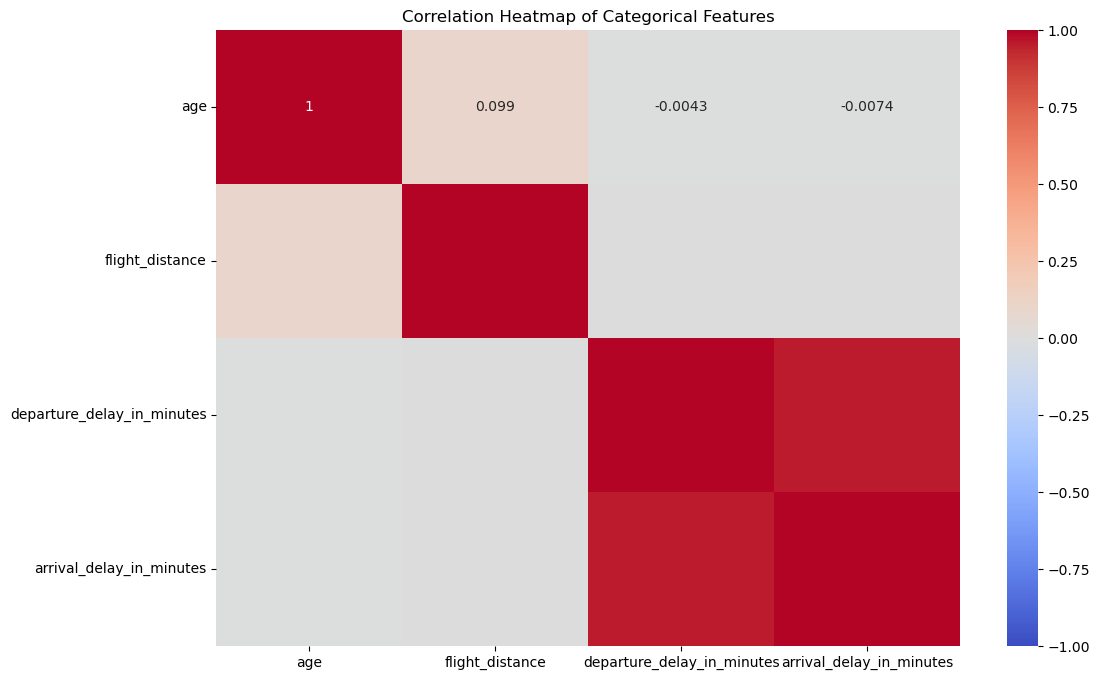

In [122]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Categorical Features')
plt.show()



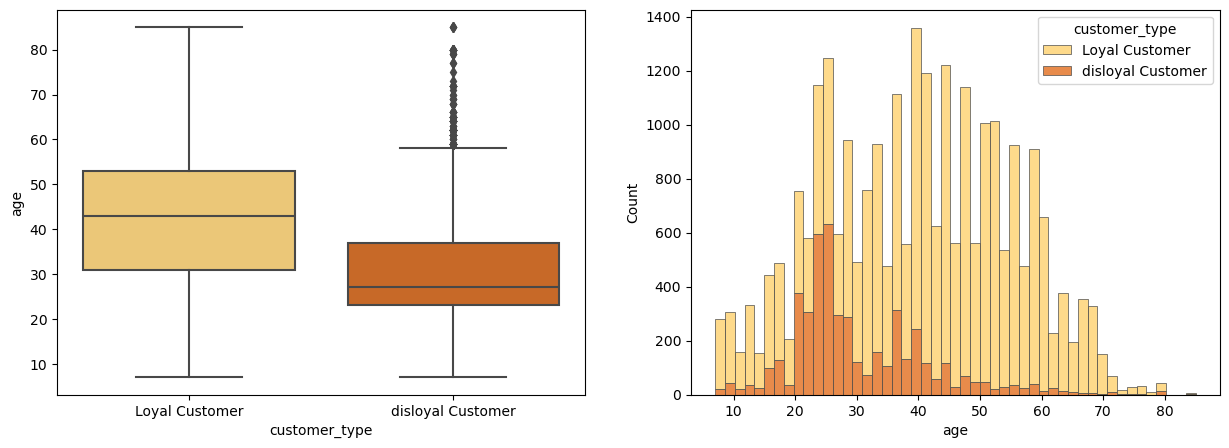

In [123]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "customer_type", y = "age", palette = "YlOrBr", data = df, ax = ax[0])
sns.histplot(df, x = "age", hue = "customer_type", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

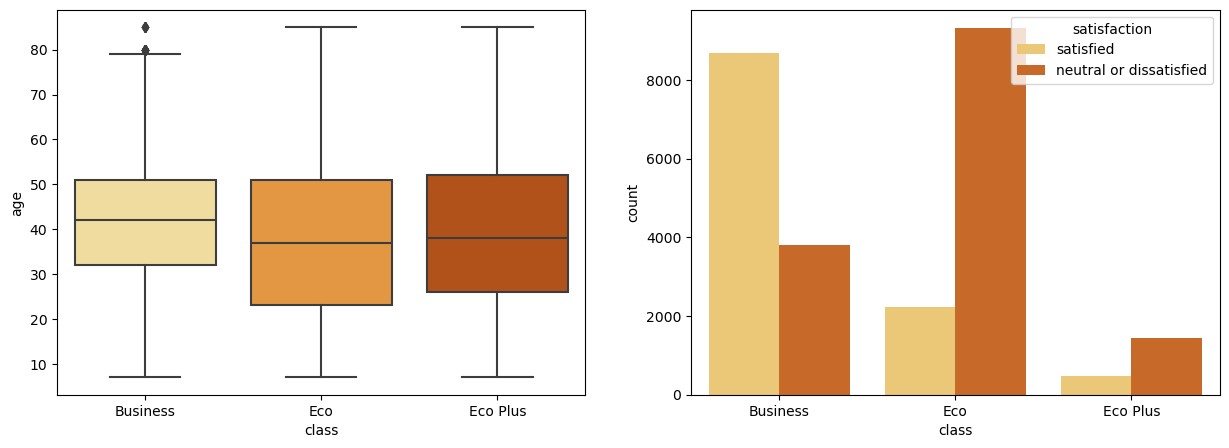

In [124]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "class", y = "age", palette="YlOrBr", data = df, ax = ax[0])
sns.countplot(x = "class", hue = "satisfaction", palette = "YlOrBr", data=df)
pass



# Save processed dataset to CSV

In [126]:
# Save train or test datasets
df.to_csv('data/processed/binary_balanced_airflight_satisfaction/' + CURR_FILE_NAME, index=False)

print("Dataset set shape: ", df.shape)
print("Dataset saved to: ", 'data/processed/binary_balanced_airflight_satisfaction/' + CURR_FILE_NAME)

Dataset set shape:  (25976, 23)
Dataset saved to:  data/processed/binary_balanced_airflight_satisfaction/test.csv
